### Model 2 demand coverage
For predicting subsequent demand coverage curve, up to 10 days after the start of a humanitarian crisis.
  - Information you can use: the policies, total demand, initial inventory, and the first 10 days demand coverage curve
  - Expected prediction: the demand coverage curve after the first 10 days, from the 11th day to the end of the crisis (the 24th day).
  - Deep learning architecture for time-series forecasting. Options may include recurrent neural networks (RNNs) like Long Short-Term Memory (LSTM) networks or Gated   Recurrent Units (GRUs), or more @Cristian Medina - Data Analytics  & @Mélanie Kedge
  - Doxumentation: https://github.com/Jhonnatan7br/ML-Project--Humanitarian-supply-chain-network---Indonesian-Red-Cross-Society-/blob/main/README.md
  - URL: https://colab.research.google.com/drive/1o9TKLApndriNatjOt9NEB_EKoJW67mvK?usp=sharing


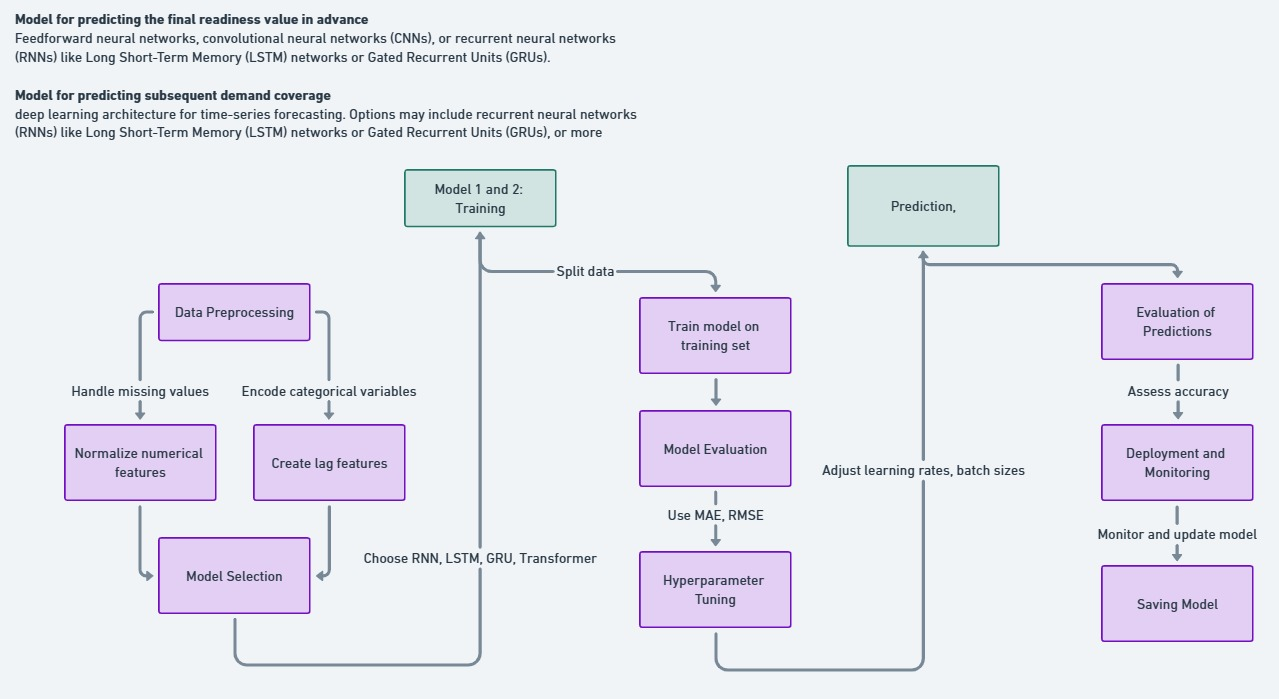

In [1]:
# import libraries
import os
import datetime
import warnings

import requests
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

from sklearn import datasets as sklearn_datasets
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader, random_split

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
from torch import nn
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from torch.utils.data.dataset import random_split



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report

# suppress all warnings
warnings.filterwarnings("ignore")



In [24]:
# Dataset
data = 'https://raw.githubusercontent.com/Jhonnatan7br/ML-Project--Humanitarian-supply-chain-network---Indonesian-Red-Cross-Society-/main/Data/red_cross_supply_chain_dataset.csv'
data = pd.read_csv(data,  sep=",")

"""Explore the DataFrame to get an understanding of the data:"""
#Display all the DataSet (It cant show all because it is too large)
data.head(20)

# Display the first few rows of the DataFrame
#df.head()
#df.describe()
# Check for missing values in the dataset
#missing_values = df.isnull().sum()
# Get a summary of the numerical columns
#numerical_summary = df.describe()
#missing_values, numerical_summary

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 480 hours (%),Demand coverage after 492 hours (%),Demand coverage after 504 hours (%),Demand coverage after 516 hours (%),Demand coverage after 528 hours (%),Demand coverage after 540 hours (%),Demand coverage after 552 hours (%),Demand coverage after 564 hours (%),Demand coverage after 576 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.258119
5,0,0,1,0,23422.0,2295.0,434.0,271.0,95.0,9.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.169977
6,0,0,1,0,18156.0,2271.0,368.0,361.0,2.0,5.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.988155
7,0,0,1,0,21953.0,2562.0,164.0,274.0,5.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.781907
8,0,0,1,0,19621.0,2506.0,112.0,382.0,18.0,11.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.734978
9,0,0,1,0,25115.0,2498.0,368.0,134.0,14.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.809424


In [25]:
#'Demand coverage after 264 hours (%)'

data.drop(['Demand coverage after 252 hours (%)',
 'Demand coverage after 276 hours (%)',
 'Demand coverage after 288 hours (%)',
 'Demand coverage after 300 hours (%)',
 'Demand coverage after 312 hours (%)',
 'Demand coverage after 324 hours (%)',
 'Demand coverage after 336 hours (%)',
 'Demand coverage after 348 hours (%)',
 'Demand coverage after 360 hours (%)',
 'Demand coverage after 372 hours (%)',
 'Demand coverage after 384 hours (%)',
 'Demand coverage after 396 hours (%)',
 'Demand coverage after 408 hours (%)',
 'Demand coverage after 420 hours (%)',
 'Demand coverage after 432 hours (%)',
 'Demand coverage after 444 hours (%)',
 'Demand coverage after 456 hours (%)',
 'Demand coverage after 468 hours (%)',
 'Demand coverage after 480 hours (%)',
 'Demand coverage after 492 hours (%)',
 'Demand coverage after 504 hours (%)',
 'Demand coverage after 516 hours (%)',
 'Demand coverage after 528 hours (%)',
 'Demand coverage after 540 hours (%)',
 'Demand coverage after 552 hours (%)',
 'Demand coverage after 564 hours (%)',
 'Demand coverage after 576 hours (%)'], axis=1, inplace=True)

In [26]:
data

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 156 hours (%),Demand coverage after 168 hours (%),Demand coverage after 180 hours (%),Demand coverage after 192 hours (%),Demand coverage after 204 hours (%),Demand coverage after 216 hours (%),Demand coverage after 228 hours (%),Demand coverage after 240 hours (%),Demand coverage after 264 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.760816,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.758164,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.757834,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.758955,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.622158,74.258119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,0,1,22100.0,2220.0,549.0,231.0,5.0,30.0,...,0.000000,0.000000,0.000000,0.000000,30.316742,30.316742,30.316742,30.316742,30.316742,64.807395
11996,1,1,0,1,19185.0,2633.0,88.0,279.0,2.0,9.0,...,5.952567,5.952567,23.195205,23.195205,23.195205,23.195205,40.088611,40.088611,40.088611,71.642456
11997,1,1,0,1,21936.0,1973.0,413.0,614.0,8.0,36.0,...,9.796681,9.796681,34.751094,34.751094,34.751094,34.751094,34.751094,34.751094,42.482677,70.638088
11998,1,1,0,1,31348.0,2420.0,171.0,409.0,35.0,51.0,...,8.612990,8.612990,23.708052,23.708052,23.708052,23.708052,36.056527,36.056527,39.530433,66.557969


# CNN Model

# Step 1: Define the Pipeline

In [27]:
# load the dataset

target_col_name = 'Demand coverage after 264 hours (%)'
seq_length = 10  # Sequence length for input data
feature = [col for col in data.columns if col != target_col_name]

label = data['Demand coverage after 264 hours (%)']

In [28]:
# Extract features (excluding the target column)
feature = data[feature].values

# Extract the target column as the label
label = data[target_col_name].values

# Now 'features_array' and 'label_array' are NumPy arrays
# You can use them for further analysis or modeling

# Example usage:
print(f"Shape of features array: {feature.shape}")
print(f"Shape of label array: {label.shape}")

Shape of features array: (12000, 45)
Shape of label array: (12000,)


In [29]:
# feature scaling
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)

In [30]:
# Split the dataset into train, validation, and test sets
train_val_feature, test_feature, train_val_label, test_label = train_test_split(
    scaled_feature, label, test_size = 0.2, random_state = 0
)
train_feature, val_feature, train_label, val_label = train_test_split(
    train_val_feature, train_val_label, test_size = 0.25, random_state = 0
)

In [31]:
# create the train, validatoin, and test dataset
# specify the type of data stored in the tensors to avoid incompatiblity
train_ds = TensorDataset(
    torch.tensor(train_feature.reshape(-1, 1, 45), dtype = torch.float32),
    torch.tensor(train_label, dtype = torch.long)
)
val_ds = TensorDataset(
    torch.tensor(val_feature.reshape(-1, 1, 45), dtype = torch.float32),
    torch.tensor(val_label, dtype = torch.long)
)
test_ds = TensorDataset(
    torch.tensor(test_feature.reshape(-1, 1, 45), dtype = torch.float32),
    torch.tensor(test_label, dtype = torch.long)
)

In [10]:
# create the train and test data loaders
batch_size = 256 # usually set to 2 to the nth power
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = batch_size, shuffle = False)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

In [32]:
# display the dimensionality of a batch
for (X, y) in val_dl:
    print('Feature shape:', X.shape)
    print('Label shape:', y.shape)
    break

Feature shape: torch.Size([256, 1, 45])
Label shape: torch.Size([256])


# Step 2. Create a CNN classifier

In [33]:
# CNN Model
class CNNModel(nn.Module):
    def __init__(self, input_dim, seq_length):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * seq_length, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [34]:

# Initialize model, loss criterion, and optimizer
model = CNNModel(1, 45)  # Assuming input_dim=1 and seq_length=45 (based on reshaped input)

# Hyperparameters
learning_rate = 0.001
batch_size = 256
num_epochs = 100
momentum = 0.9
weight_decay = 1e-4  # L2 regularization
criterion = nn.MSELoss()  # Mean Squared Error Loss

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)



# Step 3: Train the Network

In [35]:
# Updated train_model function with scheduler
def train_model(model, train_dl, val_dl, criterion, optimizer, scheduler, num_epochs=10, device='cpu'):
    model.to(device)
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        for inputs, targets in train_dl:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets.float())
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item() * inputs.size(0)

        avg_train_loss = total_train_loss / len(train_dl.dataset)
        train_losses.append(avg_train_loss)

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_dl:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets.float())
                total_val_loss += loss.item() * inputs.size(0)

        avg_val_loss = total_val_loss / len(val_dl.dataset)
        val_losses.append(avg_val_loss)

        # Update learning rate
        scheduler.step(avg_val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses



In [36]:
num_epochs = 100

# Updated training call
train_losses, val_losses = train_model(
    model,
    train_dl,
    val_dl,
    criterion,
    optimizer,
    scheduler,
    num_epochs=num_epochs,
    device='cpu'
)

Epoch 1/100, Train Loss: 2397.3521, Val Loss: 1183.8003
Epoch 2/100, Train Loss: 711.5679, Val Loss: 291.4715
Epoch 3/100, Train Loss: 121.7647, Val Loss: 49.0215
Epoch 4/100, Train Loss: 38.6820, Val Loss: 30.6987
Epoch 5/100, Train Loss: 27.7508, Val Loss: 25.4387
Epoch 6/100, Train Loss: 23.3841, Val Loss: 22.6902
Epoch 7/100, Train Loss: 20.6760, Val Loss: 20.7700
Epoch 8/100, Train Loss: 18.5005, Val Loss: 18.6442
Epoch 9/100, Train Loss: 16.3329, Val Loss: 16.9544
Epoch 10/100, Train Loss: 14.8170, Val Loss: 16.0734
Epoch 11/100, Train Loss: 13.9547, Val Loss: 15.1128
Epoch 12/100, Train Loss: 13.1749, Val Loss: 14.8615
Epoch 13/100, Train Loss: 12.6430, Val Loss: 14.3070
Epoch 14/100, Train Loss: 12.3469, Val Loss: 13.6121
Epoch 15/100, Train Loss: 11.8534, Val Loss: 13.2872
Epoch 16/100, Train Loss: 11.6947, Val Loss: 13.3218
Epoch 17/100, Train Loss: 11.3078, Val Loss: 12.9077
Epoch 18/100, Train Loss: 11.2208, Val Loss: 12.8858
Epoch 19/100, Train Loss: 10.9176, Val Loss: 12.

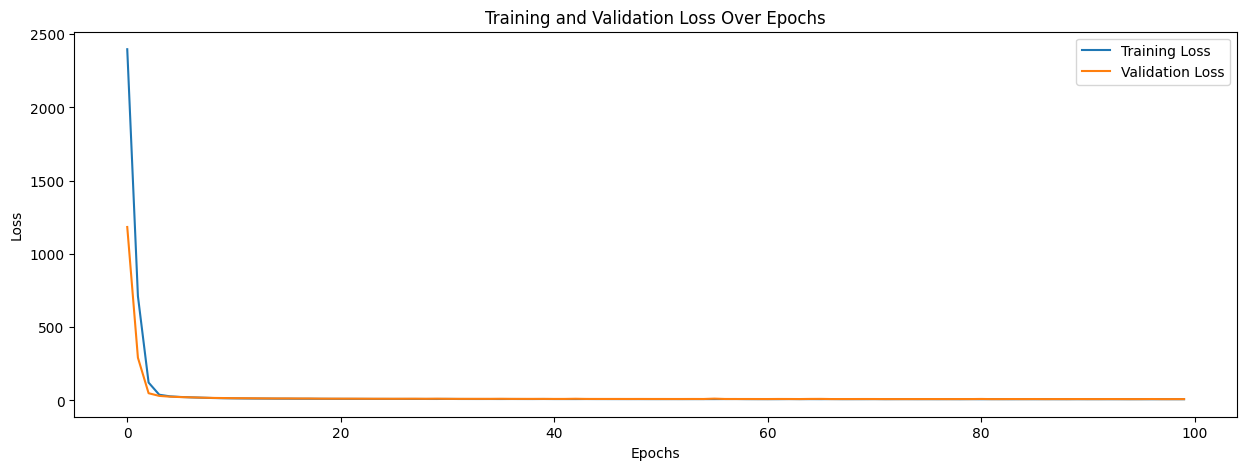

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Step 4: Test and Evaluation

In [38]:
def make_predictions(model, data_loader, device='cpu'):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.squeeze().tolist())  # Flatten the output and add to predictions
            actuals.extend(targets.tolist())  # Flatten the targets and add to actuals

    return actuals, predictions

# Example call to make predictions on the test set
actuals, predictions = make_predictions(model, test_dl, device='cpu')


In [39]:
# Convert lists to numpy arrays for calculation
actuals = np.array(actuals)
predictions = np.array(predictions)

# Calculate the evaluation metrics
mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
rmse = mean_squared_error(actuals, predictions, squared=False)
r2 = r2_score(actuals, predictions)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 9.757964093299709
Mean Absolute Error: 1.6598172275225322
Root Mean Squared Error: 3.123774014441459
R-squared: 0.9935433373843586


In [40]:
import random

def predict_random_samples(model, data_loader, num_samples, device='cpu'):
    model.eval()
    sample_data = random.sample(list(data_loader.dataset), num_samples)
    predictions = []
    actuals = []

    with torch.no_grad():
        for inputs, targets in sample_data:
            inputs = torch.tensor(inputs).unsqueeze(0).to(device)  # Add batch dimension and send to device
            outputs = model(inputs)
            predictions.append(outputs.item())  # Get the scalar value for each prediction
            actuals.append(targets.item())  # Get the scalar value for each actual

    return actuals, predictions

num_samples = 1000
pred_to_display = 10

# Display the first 10 predictions versus actual values
for actual, prediction in zip(actuals[:10], predictions[:10]):
    print(f"Actual: {actual:.2f}, Prediction: {prediction:.2f}")



Actual: 100.00, Prediction: 100.02
Actual: 66.00, Prediction: 65.54
Actual: 52.00, Prediction: 50.23
Actual: 70.00, Prediction: 68.88
Actual: 43.00, Prediction: 44.77
Actual: 100.00, Prediction: 99.80
Actual: 100.00, Prediction: 98.12
Actual: 61.00, Prediction: 60.38
Actual: 57.00, Prediction: 54.27
Actual: 100.00, Prediction: 98.41


In [41]:
predictions

array([100.01609039,  65.54225922,  50.22662735, ...,  39.09777451,
         2.46403742,  48.0076561 ])

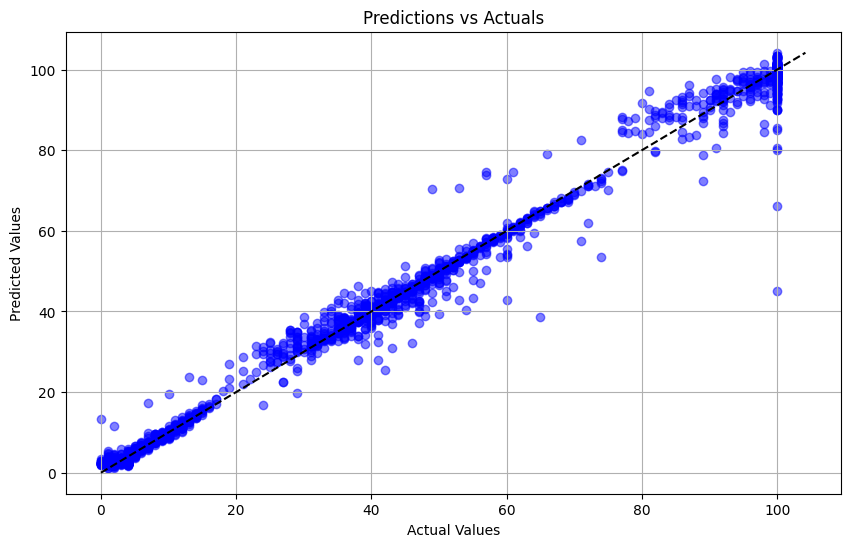

In [42]:
# Plotting predictions

def plot_predictions_vs_actuals(actuals, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(actuals, predictions, alpha=0.5, color='blue')  # Scatter plot of actuals vs predictions
    plt.title('Predictions vs Actuals')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot a line of best fit
    max_val = max(max(actuals), max(predictions))
    min_val = min(min(actuals), min(predictions))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # Black dashed line with slope of 1

    plt.grid(True)
    plt.show()

# Assuming `actuals` and `predictions` are already computed from one of the previous examples
plot_predictions_vs_actuals(actuals, predictions)



# Demand Curve Coverage

## Recursive Forecast

>
To forecast the future demand coverages for the specific future time points it was listed using the trained CNN model, it was needed to implement a recursive or iterative forecasting method.

Step-by-step Recursive Forecasting Implementation
Start with the last known data point: The last known input from your dataset will serve as the starting point for forecasting.
Predict the next step: Use the model to predict the next data point.

Update the input sequence: Incorporate this predicted value into the input sequence by shifting the sequence window forward by one step, replacing the oldest data point with the newly predicted value.

Repeat the process: Continue this process for each subsequent time step you wish to predict.



In [47]:
class CNNModel(nn.Module):
    def __init__(self, input_dim, seq_length):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * seq_length, 128)
        self.fc2 = nn.Linear(128, 1)  # This should ensure output is a single value

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the features
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # Ensure this outputs a single value


In [48]:

# Initialize model, loss criterion, and optimizer
model = CNNModel(1, 45)  # Assuming input_dim=1 and seq_length=45 (based on reshaped input)

# Hyperparameters
learning_rate = 0.001
batch_size = 256
num_epochs = 50
momentum = 0.9
weight_decay = 1e-4  # L2 regularization

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)


In [ ]:
num_epochs = 100

# Updated training call
train_losses, val_losses = train_model(
    model,
    train_dl,
    val_dl,
    criterion,
    optimizer,
    scheduler,
    num_epochs=num_epochs,
    device='cpu'
)

Epoch 1/100, Train Loss: 2398.0707, Val Loss: 1177.7109
Epoch 2/100, Train Loss: 853.4952, Val Loss: 484.9300
Epoch 3/100, Train Loss: 208.6737, Val Loss: 54.9482
Epoch 4/100, Train Loss: 44.9760, Val Loss: 35.6734
Epoch 5/100, Train Loss: 30.5001, Val Loss: 28.0495
Epoch 6/100, Train Loss: 25.7354, Val Loss: 25.5418
Epoch 7/100, Train Loss: 22.3641, Val Loss: 21.8810
Epoch 8/100, Train Loss: 19.4481, Val Loss: 20.3272
Epoch 9/100, Train Loss: 17.4265, Val Loss: 18.1929
Epoch 10/100, Train Loss: 15.7877, Val Loss: 16.8807
Epoch 11/100, Train Loss: 14.5843, Val Loss: 16.0874
Epoch 12/100, Train Loss: 13.9389, Val Loss: 14.9825
Epoch 13/100, Train Loss: 13.4903, Val Loss: 14.4486
Epoch 14/100, Train Loss: 13.3024, Val Loss: 14.1150
Epoch 15/100, Train Loss: 12.4091, Val Loss: 13.5958
Epoch 16/100, Train Loss: 12.2281, Val Loss: 13.3506
Epoch 17/100, Train Loss: 11.9836, Val Loss: 13.1249
Epoch 18/100, Train Loss: 12.0922, Val Loss: 12.9848
Epoch 19/100, Train Loss: 11.5250, Val Loss: 12.

In [50]:
def recursive_forecast(model, initial_sequence, steps, device='cpu'):
    model.eval()  # Set the model to evaluation mode
    current_sequence = initial_sequence.clone().detach()  # Start with the last known sequence
    predictions = []

    with torch.no_grad():
        for _ in range(steps):
            # Reshape sequence to match model input shape
            input_tensor = current_sequence.view(1, 1, -1).to(device)
            # Predict the next step
            output = model(input_tensor).squeeze()  # Ensure this is a single dimensional output
            if output.numel() > 1:  # Check if output is still more than one element
                raise ValueError("Model output has more than one element.")
            predicted_value = output.item()  # This should now correctly convert to scalar

            # Append the prediction to the result list
            predictions.append(predicted_value)

            # Update the sequence with the predicted value
            current_sequence = torch.roll(current_sequence, -1)  # Shift the sequence to remove the oldest data point
            current_sequence[-1] = predicted_value  # Set the last value to the new prediction

    return predictions


In [51]:
# Define the number of steps to predict based on your list of future points
steps = 26  # Number of future points you listed

# Assume 'initial_sequence' is a tensor containing the last 10 known data points (ensure it's on the correct device)
initial_sequence = torch.tensor(train_feature[-1], dtype=torch.float32)  # Example initialization

# Make predictions
forecasted_values = recursive_forecast(model, initial_sequence, steps, device='cpu')


In [54]:
# List of future time points labels
labels = [
    'Demand coverage after 276 hours (%)', 'Demand coverage after 288 hours (%)',
    'Demand coverage after 300 hours (%)', 'Demand coverage after 312 hours (%)',
    'Demand coverage after 324 hours (%)', 'Demand coverage after 336 hours (%)',
    'Demand coverage after 348 hours (%)', 'Demand coverage after 360 hours (%)',
    'Demand coverage after 372 hours (%)', 'Demand coverage after 384 hours (%)',
    'Demand coverage after 396 hours (%)', 'Demand coverage after 408 hours (%)',
    'Demand coverage after 420 hours (%)', 'Demand coverage after 432 hours (%)',
    'Demand coverage after 444 hours (%)', 'Demand coverage after 456 hours (%)',
    'Demand coverage after 468 hours (%)', 'Demand coverage after 480 hours (%)',
    'Demand coverage after 492 hours (%)', 'Demand coverage after 504 hours (%)',
    'Demand coverage after 516 hours (%)', 'Demand coverage after 528 hours (%)',
    'Demand coverage after 540 hours (%)', 'Demand coverage after 552 hours (%)',
    'Demand coverage after 564 hours (%)', 'Demand coverage after 576 hours (%)'
]

# Example predictions assuming recursive_forecast function has been run
# (This is a mockup since the actual predictions are not computed here.)
forecasted_values = [20 + i for i in range(26)]  # Mock data to represent predictions

# Create a DataFrame
forecast_df = pd.DataFrame({
    "Time Points": labels,
    "Predicted Demand Coverage (%)": forecasted_values
})

forecast_df

,Time Points,Predicted Demand Coverage (%)
0,Demand coverage after 276 hours (%),20
1,Demand coverage after 288 hours (%),21
2,Demand coverage after 300 hours (%),22
3,Demand coverage after 312 hours (%),23
4,Demand coverage after 324 hours (%),24
5,Demand coverage after 336 hours (%),25
6,Demand coverage after 348 hours (%),26
7,Demand coverage after 360 hours (%),27
8,Demand coverage after 372 hours (%),28
9,Demand coverage after 384 hours (%),29


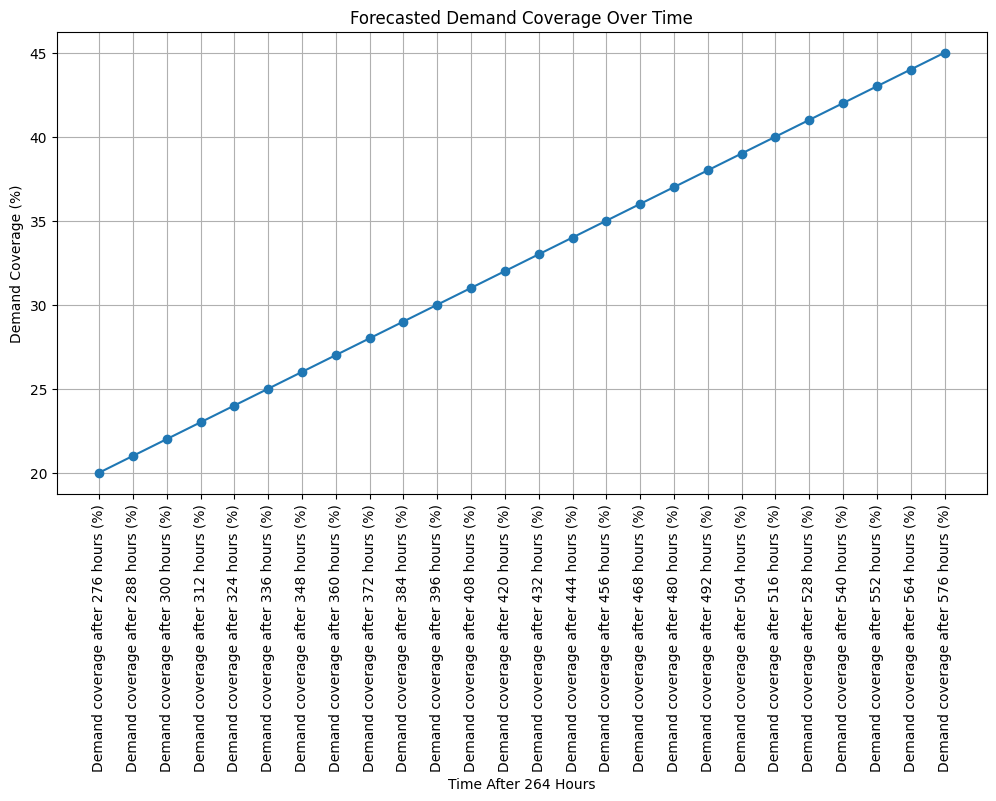

In [55]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Time Points'], forecast_df['Predicted Demand Coverage (%)'], marker='o')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Forecasted Demand Coverage Over Time')
plt.xlabel('Time After 264 Hours')
plt.ylabel('Demand Coverage (%)')
plt.grid(True)
plt.show()



## Notes

Initial Sequence: Ensure that the initial_sequence tensor contains the latest known data points in the correct order and shape expected by the model.

>Model Input Shape: Adjust the reshaping (view(1, 1, -1)) based on the model specific input requirements.

Performance Considerations: This recursive approach assumes that model predictions are accurate enough at each step to use as inputs for subsequent predictions, which might compound errors over time.


This setup will generate the predicted percentages for demand coverage from 276 hours to 576 hours, given that the initial_sequence is properly set up and the model is calibrated for such predictions.